<a href="https://colab.research.google.com/github/mha142/my_pytorch_tutorials/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resource: https://www.learnpytorch.io/01_pytorch_workflow/

In [4]:
import torch
from torch import nn # nn contains all the building blocks for neural networks
import matplotlib.pyplot as plt

print(torch.__version__)
print(torch.cuda.is_available())

2.6.0+cu124
False


## 1. Data preparing and loading

Data can be any thing:
* text
* excel spreadsheet
* audio
* images
* videos
* DNA

Machine learning is a game of two parts:
1. turn data into numbers
2. build or use a model to learn patterns in those numbers

In [5]:
#create "known" parameters
# usually we don't know the parameters and we let machine learning figure out the relationship between the input X and the output y
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X is capital beacuase it represnets a matrix or a tensor
y = weight * X + bias # y is small because it represents a vector, but later maybe in another code it might represent a matrix or a tensor and then we will use capital Y

#show the first 10 elements of X and y
print(X[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


##splitting data into training and testing **very important**

In [6]:
train_split = int(0.8 * len(X)) #80 % of the length of X
X_train, y_train = X[:train_split], y[:train_split]# :train_split -> means from the beginning up until the train split
X_test, y_test = X[train_split:], y[train_split:] # train_split: -> from the train split to the end of the data

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [7]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #are there any predictions?
  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions") # to know how good the model is we compare the predictions to y_test (which is the test set)

  plt.legend(prop={"size":14})

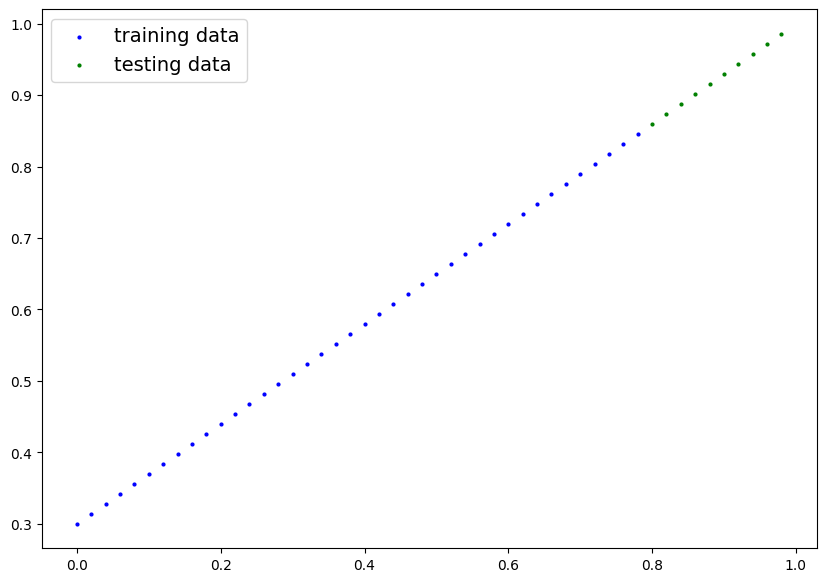

In [8]:
plot_predictions()

## 2. Build the model

A resource to learn more about classes:
https://realpython.com/python3-object-oriented-programming/

In [9]:
# Create a linear regression model class
class LinearRegressionModel(nn.Module): # the class LinearRegressionModel inherits from nn.Module, so nn.Module is a subclass
  #create a construtor
  def __init__(self):
    super().__init__()
    #weights and bias will start with random numbers then will go through the forward function that looks at the training data and adjusts the weights and bias and it will try to be close as possible to the "known" parameters that we already used to create the data, w= 0.7 and b= 0.3 through an algorithm called gradient decent & backpropagation
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  #shift + tab to make this function indentation alines with the intructor
  #create the forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: #x is the nput data(aka training data), (x: torch.Tensor) means that the data type of x is torch.tensor, and the function returns torch.tensor
    return self.weights * x + self.bias # the linear regression formula

### Check the contents of our Pytorch model

In [10]:
#run this multiple times to see how the random number changes
print(torch.randn(1))


tensor([1.9342])


In [11]:
#the random number is now fixed because of the seed
torch.manual_seed(42)
print(torch.randn(1))

tensor([0.3367])


In [12]:
#create a random seed
torch.manual_seed(42)

#create an instance of the model (aka) call the class
model_0 = LinearRegressionModel()

#check the model parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [13]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [14]:
# we will train the model to get its paramters values to be as close as possible to the values that we have initialized (our ideal values)

weight, bias

# in most cases you will not know what are the ideal values, unlike here since we have a simple example

(0.7, 0.3)

In [15]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [16]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [17]:
# make predictions with the model
with torch.inference_mode(): # inference means predictions # with this we don't keep track of the gradients so we get the model to predict the values faster, here you will not find a difference because we have a little data but  this is so important if you have a lot of data
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [18]:
# you can also do the same thing with the following
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

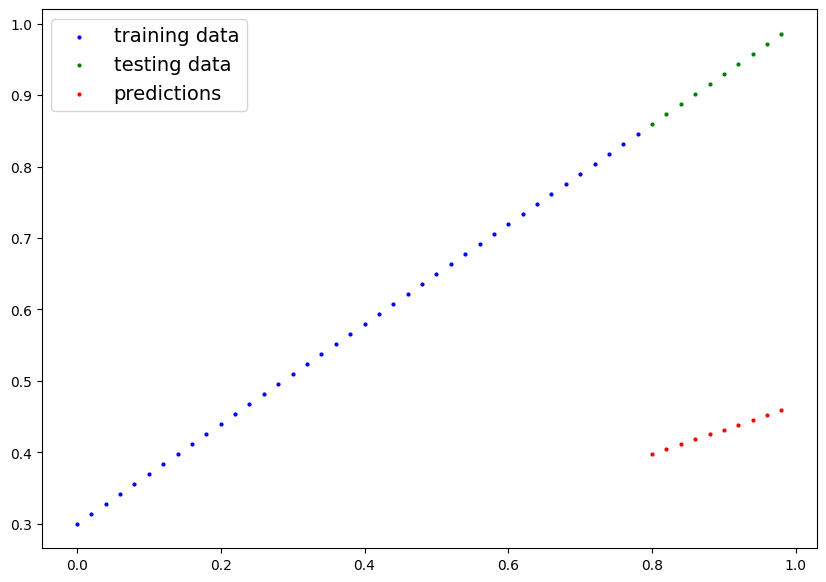

In [19]:
#plot predictions vs truth
plot_predictions(predictions=y_preds) #look how far away the predictied red dots from the ideal green dots

##we need to train the model to move the red dots to be close to the green dots

## loss function = cost function = criterion

* the loss function measures how wrong your predictions are to the ideal output, the lower the better (lower is better)


* to measure how far away the prediction is we need to find the squared distance between the predicted point and the ground truth (original) point

* the squared distance = aka. squared L2 norm = aka. **Mean Squared Error** (MSE)

* use the squared distance (sum of squared differences) instead of the raw Euclidean distance (with square root) because The square root is non-linear and makes calculus (like taking gradients) more complicated

* review how to calculate the Euclidean distance:  https://www.youtube.com/watch?v=dMc_PZ1Md90

* the optimizer adjusts the model parameters (weight and bias) to improve/lower the loss function

* pytorch loss functions: https://docs.pytorch.org/docs/stable/nn.html#loss-functions
* use nn.BCELoss for biary classification problem

* pytorch optimizers: https://docs.pytorch.org/docs/stable/optim.html

* the first minute of this video gives a real life example of what is gradient decent: https://www.youtube.com/watch?v=i62czvwDlsw



In [20]:
loss_fn = nn.L1Loss() # MAE = mean absolute error

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # stochastic gradient descent
                            #lr = learning rate (most important hyperparameter)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

* small learning rate means it will change only a small value (aka. it will take a small step)
* big learning rate means it will change a big value (aka. it will take a big step)

model_0.state_dict() ------output-----> OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

so if the weights= 0.3367 and
* if lr = 0.1 it will change a big value (the bold italic decimal value) 0.***3***
* if lr = 0.01 it will change 0.3***3***
* if lr = 0.001 it will change 0.33***6***
* if lr = 0.0001 it will change a really small value 0.336***7***




## Training and testing loop song
https://www.youtube.com/watch?v=Nutpusq_AFw

In [22]:
# An epoch is one loop through the data (this is a hyperparameter because we set it up ourselves)
epochs = 200

#Track different vlues
epoch_count = []
loss_values = []
test_loss_values = []

#Training
# 0. loop through data
for epoch in range(epochs):
  model_0.train() #put the model in training mode

  #1. forward pass (aka forward propagation)
  y_pred = model_0(X_train) # the model learns the patterns of the data here at the step, and then evaluate the patterns that it has learned in the testing loop

  #2. calculate the loss
  loss = loss_fn(y_pred, y_train)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the model parameters
  loss.backward()

  #5. Perform gradient decent # pytorch creates a gradient decent curve for each parameter
  #this line will update the model parameters and try to get them closer to the ideal data/ ground truth data and makes the loss closer to zero
  optimizer.step()# the optimizer channges will accumulage through the loop that is why we need to set the optimizer back to zero in each iteration with optimizer.zero_grad()

  # Testing
  model_0.eval()# turns off different model settings that we don't need for evaluating and testing (dropout and batch norm layers)

  with torch.inference_mode():#turns off gradient tracking
  # with torch.no_grad():
    #1. forward pass
    test_preds = model_0(X_test)

    #2. calculate the loss
    test_loss = loss_fn(test_preds, y_test)

  #print the loss every 10 epochs
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())
    print('---------------------------------------------------------')


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
---------------------------------------------------------
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
---------------------------------------------------------
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
---------------------------------------------------------
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
---------------------------------------------------------
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
--------------------------------------------------

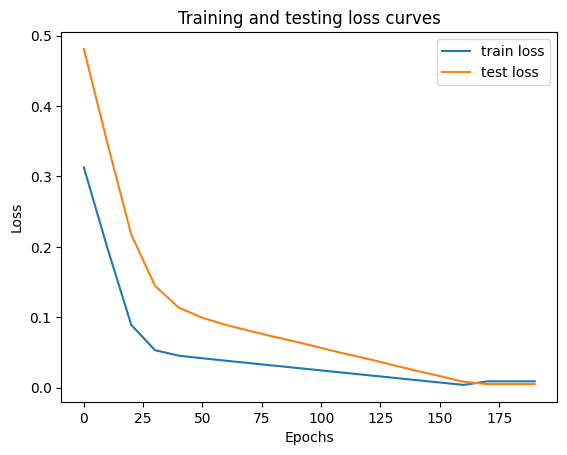

In [23]:
#plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label= "train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label= "test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

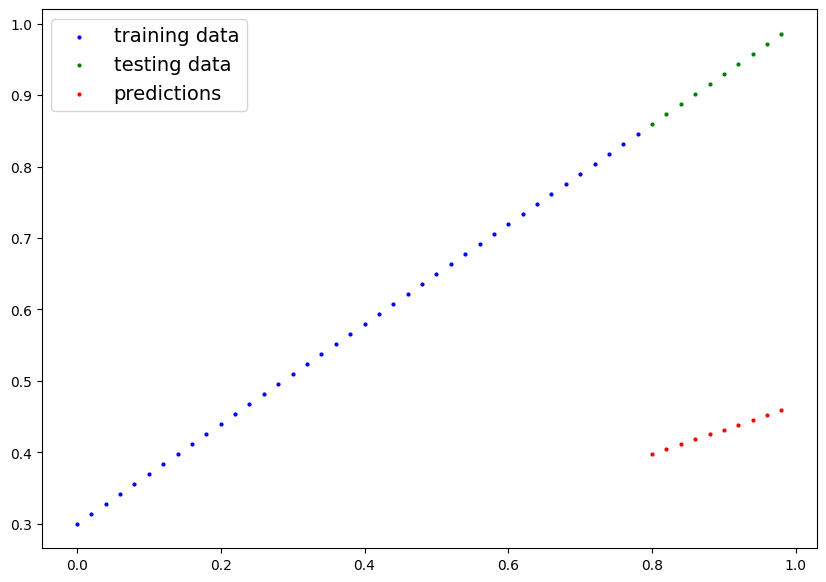

In [24]:
plot_predictions(predictions=y_preds)

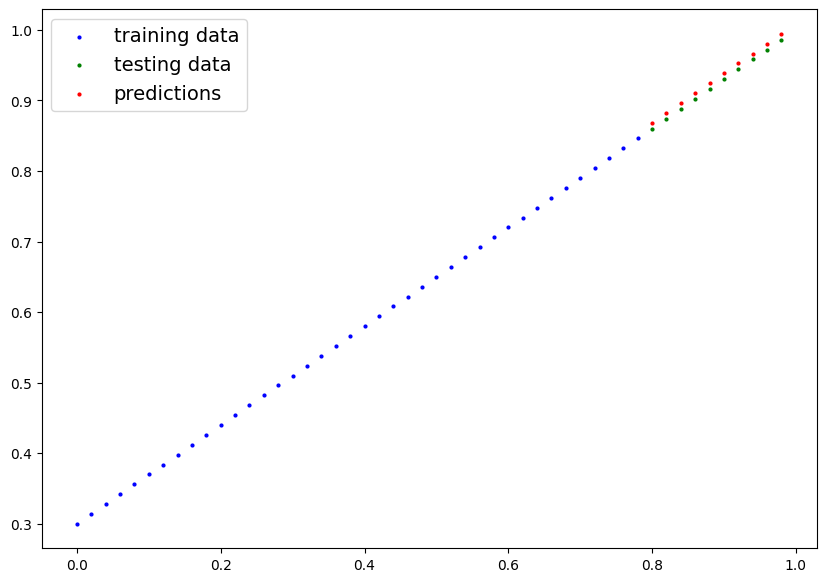

In [25]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

plot_predictions(predictions=y_preds_new)

# Saving a Pytorch model

In [26]:
from pathlib import Path

# 1. create a model directory # insead of creating a folder manually
MODEL_PATH = Path ("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dictionary
print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving the model to: models/01_pytorch_workflow_model.pth


In [27]:
#check the files that exsist in the models folder
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Jul 31 22:18 01_pytorch_workflow_model.pth


#Loading the model

In [28]:
#check the saved model
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [29]:
#create an instance of our model class
loaded_model_0 = LinearRegressionModel()

#notice that the parameters values are random and don't match the values in the previous cell
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [30]:
#load the model()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [31]:
#now notice how the parameter values of the loaded model are the same as the values of the saved model
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [32]:
# Make some predictions with the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [33]:
# make some predictions with the original trained model
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [34]:
# compare loaded model preds with the orignal model preds
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# 6. Putting it all together in one place

In [35]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.6.0+cu124'

In [36]:
#create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6.1 Data


In [37]:
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#create X and y for features and labels
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze errors will pop up
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [38]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [39]:
def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")

  #are there any predictions?
  if predictions is not None:
    #plot predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions") # to know how good the model is we compare the predictions to y_test (which is the test set)

  plt.legend(prop={"size":14})

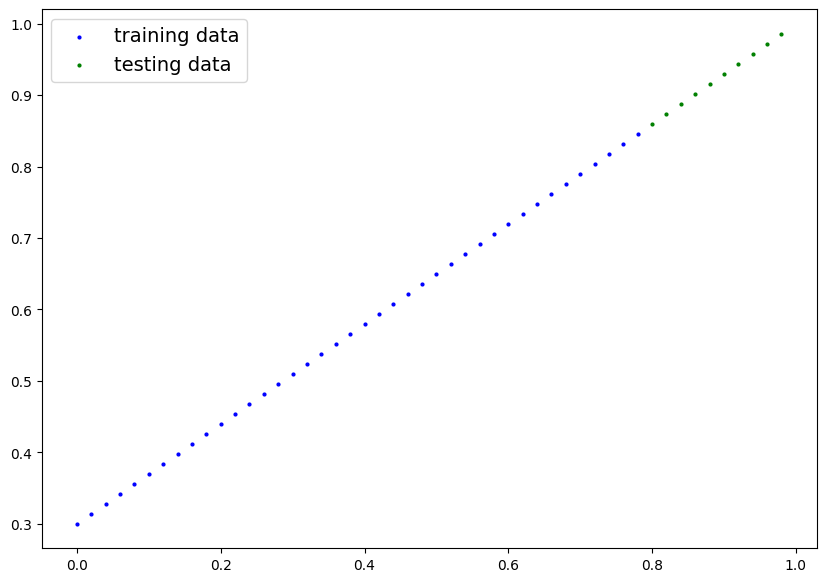

In [40]:
#plot the data using the previously defined function
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a pytorch linear model (straight line)

In [41]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    #linear layer = aka linear transform
    self.linear_layer = nn.Linear(in_features=1, #y = ax + b
                                  out_features=1) # input one feature x to output one feature y

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)


In [42]:
#torch.manual_seed(42) # I don't know why when I put this random seed the loss doesn't change, it stays the same
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
              ('linear_layer.bias', tensor([-0.7336]))]))

In [43]:
X_train[:5], y_train[:5] # show the first 5 elements

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [44]:
# check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [45]:
# set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [46]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8815]])),
             ('linear_layer.bias', tensor([-0.7336]))])

## 6.3 Training
* loss function
* optimizer
* training loop
* testing loop


In [47]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [48]:
torch.manual_seed(42)

epochs = 200

#Track different vlues
epoch_count = []
loss_values = []
test_loss_values = []

#put the data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing
  model_1.eval()
  with torch.inference_mode():
    test_preds = model_1(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_1.state_dict())
    print('---------------------------------------------------------')


Epoch: 0 | Loss: 0.9628263711929321 | Test loss: 0.858583927154541
OrderedDict([('linear_layer.weight', tensor([[0.8854]])), ('linear_layer.bias', tensor([-0.7236]))])
---------------------------------------------------------
Epoch: 10 | Loss: 0.8476165533065796 | Test loss: 0.7238741517066956
OrderedDict([('linear_layer.weight', tensor([[0.9244]])), ('linear_layer.bias', tensor([-0.6236]))])
---------------------------------------------------------
Epoch: 20 | Loss: 0.732406735420227 | Test loss: 0.5891643166542053
OrderedDict([('linear_layer.weight', tensor([[0.9634]])), ('linear_layer.bias', tensor([-0.5236]))])
---------------------------------------------------------
Epoch: 30 | Loss: 0.6171968579292297 | Test loss: 0.4544544219970703
OrderedDict([('linear_layer.weight', tensor([[1.0024]])), ('linear_layer.bias', tensor([-0.4236]))])
---------------------------------------------------------
Epoch: 40 | Loss: 0.5019866824150085 | Test loss: 0.3197440505027771
OrderedDict([('linear_

In [49]:
#Compare the previous training output to the original weight and bias
weight, bias

(0.7, 0.3)

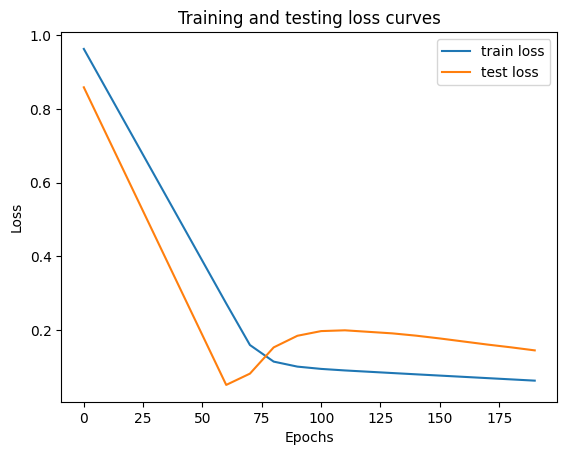

In [50]:
#plot the loss curves
plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label= "train loss")
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label= "test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## 6.4 make predictions

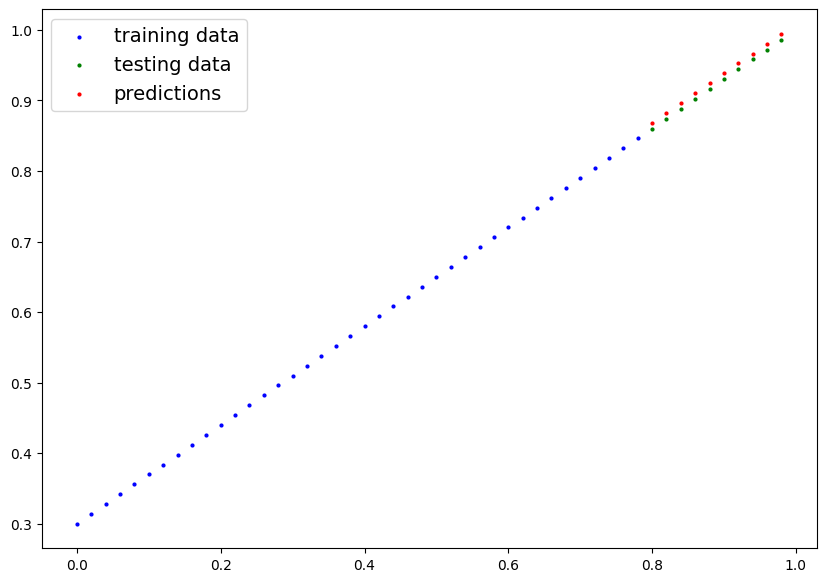

In [51]:
plot_predictions(predictions=y_preds)

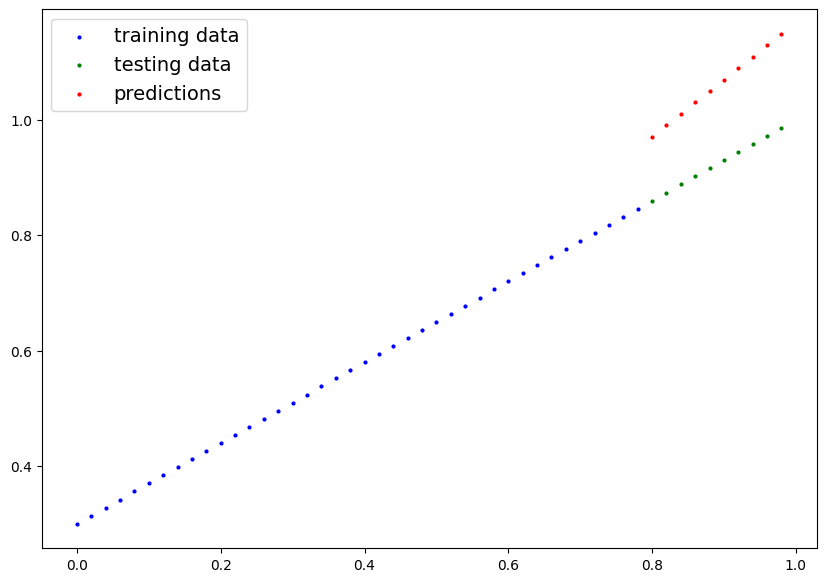

In [52]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

plot_predictions(predictions=y_preds_new)

## 6.5 saving and loading a trained model

In [53]:
from pathlib import Path

# 1. create a model directory # insead of creating a folder manually
MODEL_PATH = Path ("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. save the model state dictionary
print(f'Saving the model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [54]:
#check the files that exsist in the models folder
!ls -l models

total 8
-rw-r--r-- 1 root root 1744 Jul 31 22:18 01_pytorch_workflow_model_1.pth
-rw-r--r-- 1 root root 1668 Jul 31 22:18 01_pytorch_workflow_model.pth


In [55]:
#loading the model
#check the saved model
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9911]])),
             ('linear_layer.bias', tensor([0.1779]))])

In [56]:
#create an instance of our model class
loaded_model_1 = LinearRegressionModelV2()

#notice that the parameters values are random and don't match the values in the previous cell
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [57]:
#load the model
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [58]:
#put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [59]:
#check if the parameters are on the right device
next(loaded_model_1.parameters()).device

device(type='cpu')

In [60]:
#now notice how the parameter values of the loaded model are the same as the values of the saved model
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.9911]])),
             ('linear_layer.bias', tensor([0.1779]))])

In [61]:
# Make some predictions with the loaded model
# Evaluate the model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

loaded_model_preds

tensor([[0.9708],
        [0.9906],
        [1.0104],
        [1.0302],
        [1.0500],
        [1.0699],
        [1.0897],
        [1.1095],
        [1.1293],
        [1.1492]])

In [62]:
# make some predictions with the original trained model
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

loaded_model_preds

tensor([[0.9708],
        [0.9906],
        [1.0104],
        [1.0302],
        [1.0500],
        [1.0699],
        [1.0897],
        [1.1095],
        [1.1293],
        [1.1492]])

In [63]:
# compare loaded model preds with the orignal model preds
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])